<a href="https://colab.research.google.com/github/mtoriik/Trial/blob/master/UpdatedRNA_Angles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install Biopython ##only need to run once

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.3 MB/s eta 0:00:00


In [ ]:
from Bio.PDB import *

In [ ]:
p=PDBParser()

structure=p.get_structure('5osg', "/content/drive/MyDrive/Data Discovery/5osg.pdb")



for model in structure:
      for chain in model:
        res_array = []
        res_string_len = []
        for residue in chain:
          res_array.append(residue.resname)
          res_string_len.append(len(residue.resname))
        avg_str_len = np.mean(res_string_len)
        if avg_str_len == 3.0:
          print('its protein.')
          print(chain.id, ':', res_array)

        #RNA
        if avg_str_len == 1.0:
          print("it's RNA!")
          print(chain.id,':', res_array)
          rna = chain
          rna_bases = res_array


its protein.
h : ['ASN', 'GLY', 'VAL', 'TYR', 'VAL', 'LYS', 'ASN', 'TRP', 'GLY', 'THR', 'GLY', 'SER', 'VAL', 'ALA', 'ASP', 'ALA', 'THR', 'ASN', 'VAL', 'PHE', 'SER', 'ALA', 'ALA', 'GLY', 'LYS', 'VAL', 'VAL', 'LYS', 'VAL', 'GLN', 'LEU', 'ARG', 'ARG', 'GLN', 'ARG', 'TYR', 'ALA', 'LEU', 'VAL', 'PHE', 'PHE', 'GLU', 'ASN', 'SER', 'ALA', 'ALA', 'VAL', 'LYS', 'LYS', 'ALA', 'ILE', 'ASP', 'LEU', 'PHE', 'ASN', 'GLU', 'LYS', 'GLU', 'VAL', 'LEU', 'GLY', 'GLN', 'THR', 'VAL', 'LEU', 'VAL', 'VAL', 'PRO', 'ALA', 'LYS', 'ALA', 'SER', 'PRO', 'LYS', 'PRO', 'ASP', 'ALA', 'HIS', 'GLU', 'ASN', 'SER', 'SER', 'CYS', 'VAL', 'PHE', 'VAL', 'SER', 'PRO', 'ILE', 'PHE', 'ARG', 'PRO', 'SER', 'THR', 'THR', 'LYS', 'ALA', 'GLN', 'VAL', 'MET', 'GLU', 'LEU', 'PHE', 'ALA', 'GLY', 'VAL', 'LYS', 'VAL', 'GLN', 'ARG', 'LEU', 'ARG', 'MET', 'TYR', 'ARG', 'GLN', 'ASN', 'PHE', 'ALA', 'TYR', 'ALA', 'TYR', 'LEU', 'ASP', 'SER', 'PRO', 'ALA', 'ALA', 'ALA', 'LYS', 'LYS', 'PHE', 'VAL', 'GLU', 'GLU', 'LYS', 'ASN', 'GLY', 'THR', 'ALA', 'P

In [ ]:
#dataframe with chain, residue, atom, coordinates of atoms (without P atoms or prime atoms so just the nucleotide base)
series_list = []
for model in structure:
  for chain in model:
    i = 0
    for residue in chain:
      for atom in residue:
        if not('P' in atom.get_name()) and not("'" in atom.get_name()):
          nucleotide_dictionary = {'Chain': chain.id, 'Residue' : residue.resname + str(i), 'Atom' : atom.get_name(), 'Coordinates': atom.get_coord()}
          ser = pd.Series(nucleotide_dictionary)
          series_list.append(ser)
      i += 1
tester_dataframe = pd.concat(series_list, axis = 1)
tester_dataframe = tester_dataframe.T
tester_dataframe.head(10)
rna_df = tester_dataframe[tester_dataframe['Chain'] == '2']
rna_df

,Chain,Residue,Atom,Coordinates
1348,2,U0,N1,"[57.573, 113.454, 22.003]"
1349,2,U0,C2,"[58.167, 113.626, 23.247]"
1350,2,U0,O2,"[58.195, 114.717, 23.815]"
1351,2,U0,N3,"[58.735, 112.465, 23.789]"
1352,2,U0,C4,"[58.804, 111.196, 23.184]"
...,...,...,...,...
2146,2,U87,N3,"[32.975, 105.836, 59.746]"
2147,2,U87,C4,"[32.998, 105.233, 58.475]"
2148,2,U87,O4,"[32.037, 105.318, 57.707]"
2149,2,U87,C5,"[34.226, 104.535, 58.186]"


In [ ]:
U0_df = rna_df[rna_df['Residue'] == 'A6']
U0_df

,Chain,Residue,Atom,Coordinates
1396,2,A6,N9,"[51.4, 124.209, 39.709]"
1397,2,A6,C8,"[51.331, 122.865, 39.439]"
1398,2,A6,N7,"[52.054, 122.496, 38.418]"
1399,2,A6,C5,"[52.646, 123.635, 37.96]"
1400,2,A6,C6,"[53.496, 123.831, 36.856]"
1401,2,A6,N6,"[53.829, 122.763, 36.065]"
1402,2,A6,N1,"[53.918, 125.125, 36.672]"
1403,2,A6,C2,"[53.502, 126.066, 37.535]"
1404,2,A6,N3,"[52.696, 125.971, 38.602]"
1405,2,A6,C4,"[52.273, 124.713, 38.76]"


In [ ]:
df = U0_df
df1 = U0_df[df['Atom'].str.contains('1')]
df3 = U0_df[df['Atom'].str.contains('3')]
df5 = U0_df[df['Atom'].str.contains('5')]
df_final = df1.append(df3)
df_final = df_final.append(df5)
df_final['Coordinates']
df_final

<ipython-input-10-583cd973e177>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df1.append(df3)
<ipython-input-10-583cd973e177>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df5)


,Chain,Residue,Atom,Coordinates
1402,2,A6,N1,"[53.918, 125.125, 36.672]"
1404,2,A6,N3,"[52.696, 125.971, 38.602]"
1399,2,A6,C5,"[52.646, 123.635, 37.96]"


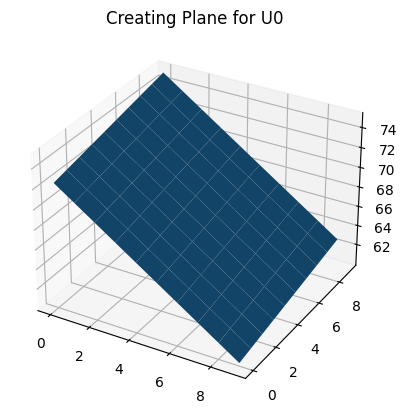

In [ ]:
points = [df_final['Coordinates'][1402],
           df_final['Coordinates'][1404],
         df_final['Coordinates'][1399] ]

p0, p1, p2 = points
x0, y0, z0 = p0
x1, y1, z1 = p1
x2, y2, z2 = p2

ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array(p0)
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(10), range(10))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
plt3d = plt.figure().add_subplot(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt.title('Creating Plane for U0')
plt.show()

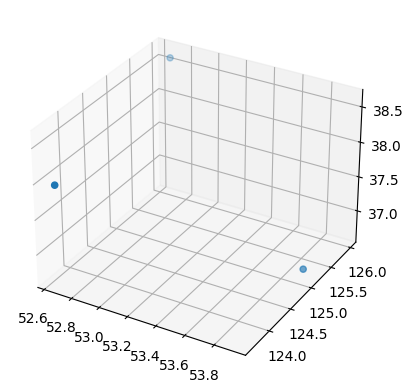

In [ ]:
x = [ points[0][0], points[1][0], points[2][0] ]
y = [points[0][1], points[1][1], points[2][1]]
z= [points[0][2], points[1][2], points[2][2]]
plt.figure().add_subplot(projection='3d').scatter(x, y, z)
plt.show()

In [ ]:
points = [df_final['Coordinates'][1348],
           df_final['Coordinates'][1351],
         df_final['Coordinates'][1354] ]

p0, p1, p2 = points
x0, y0, z0 = p0
x1, y1, z1 = p1
x2, y2, z2 = p

ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array(p0)
normal = np.array(u_cross_v)

Rz = [
    [normal[0]/np.sqrt(np.square(normal[0]) + np.square(normal[1])), normal[1]/np.sqrt(np.square(normal[0]) + np.square(normal[1])), 0],
    [-normal[1]/np.sqrt(np.square(normal[0]) + np.square(normal[1])), normal[0]/np.sqrt(np.square(normal[0]) + np.square(normal[1])), 0],
    [0,0,1]
]

normal_rz = np.dot(Rz, normal)

Ry = [
    [normal_rz[2], 0, -normal_rz[0]],
    [0,1,0],
    [normal_rz[0], 0, normal_rz[2]]
]

normal_ry_rz = np.dot(Ry, normal_rz)

d = -point.dot(normal_ry_rz)

xx, yy = np.meshgrid(range(10), range(10))

z = (-normal[0] * xx - normal_ry_rz[1] * yy - d) * 1. / normal_ry_rz[2]
print(z)
# plot the surface
plt3d = plt.figure().add_subplot(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt.title('Creating Plane for U0')
plt.show()

KeyError: ignored

In [ ]:
def equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3):

    a1 = x2 - x1
    b1 = y2 - y1
    c1 = z2 - z1
    a2 = x3 - x1
    b2 = y3 - y1
    c2 = z3 - z1
    a = b1 * c2 - b2 * c1
    b = a2 * c1 - a1 * c2
    c = a1 * b2 - b1 * a2
    d = (- a * x1 - b * y1 - c * z1)
    print("equation of plane is ",a, "x +",
          b, "y +",
          c, "z +",
          d, "= 0.")

    x = np.linspace(-1,1,10)
    y = np.linspace(-1,1,10)

    X,Y = np.meshgrid(x,y)
    Z = (d - a*X - b*Y) / c

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    surf = ax.plot_surface(X, Y, Z)
    plt.show()


x1, y1, z1 = df_final['Coordinates'][1402][0], df_final['Coordinates'][1402][1], df_final['Coordinates'][1402][2]
x2, y2, z2 = df_final['Coordinates'][1404][0], df_final['Coordinates'][1404][1], df_final['Coordinates'][1404][2]
x3, y3, z3 = df_final['Coordinates'][1399][0], df_final['Coordinates'][1399][1], df_final['Coordinates'][1399][2]
equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3)

equation of plane is  3.9653437 x + -0.8810252 y + 2.8968897 z + -209.79987 = 0.
[-8.27050049e-08  1.83755049e-08  4.98920087e+00]
10


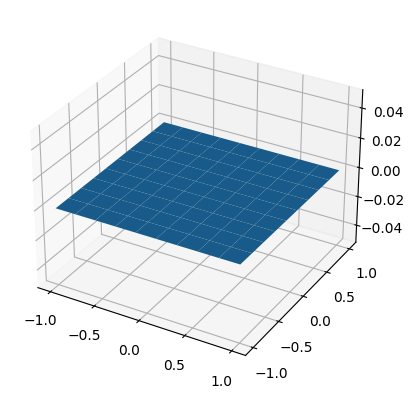

In [ ]:
##https://math.stackexchange.com/questions/1167717/transform-a-plane-to-the-xy-plane
def rotate_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3):

    a1 = x2 - x1
    b1 = y2 - y1
    c1 = z2 - z1
    a2 = x3 - x1
    b2 = y3 - y1
    c2 = z3 - z1
    a = b1 * c2 - b2 * c1
    b = a2 * c1 - a1 * c2
    c = a1 * b2 - b1 * a2
    d = (- a * x1 - b * y1 - c * z1)
    print("equation of plane is ",a, "x +",
          b, "y +",
          c, "z +",
          d, "= 0.")

    u = 1/np.sqrt(np.square(a) + np.square(b)) * np.array([b, -a, 0])
    u1 = u[0]
    u2 = u[1]
    cos = c/np.sqrt(np.square(a) + np.square(b) + np.square(c))
    sin = np.sqrt((np.square(a) + np.square(b))/(np.square(a)+np.square(b)+np.square(c)))

    rot_matrix = [
        [cos + np.square(u1)*(1-cos), u1*u2*(1-cos), u2*sin],
        [u1*u2*(1-cos), cos + np.square(u2)*(1-cos), -u1*sin],
        [-u2*sin, u1*sin, cos]
    ]
    trans = np.dot(rot_matrix,np.array([a,b,c]))
    print(trans)


    x = np.linspace(-1,1,10)
    y = np.linspace(-1,1,10)

    X,Y = np.meshgrid(x,y)
    print(len(X))
    Z = (d - a*X - b*Y) / c #finding z of the original plane

    a = trans[0]
    b = trans[1]
    c = trans[2]

    #Z = (d- a*X -  b*Y)/ c
    #treated X and Y as zero so Z = d/c
    Z = np.empty([10,10])
    Z.fill(d/c)
    Z = Z -(d/c)



    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    surf = ax.plot_surface(X, Y, Z)
    plt.show()


x1, y1, z1 = df_final['Coordinates'][1402][0], df_final['Coordinates'][1402][1], df_final['Coordinates'][1402][2]
x2, y2, z2 = df_final['Coordinates'][1404][0], df_final['Coordinates'][1404][1], df_final['Coordinates'][1404][2]
x3, y3, z3 = df_final['Coordinates'][1399][0], df_final['Coordinates'][1399][1], df_final['Coordinates'][1399][2]
rotate_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3)

equation of plane is  3.9653437 x + -0.8810252 y + 2.8968897 z + -209.79987 = 0.
-42.05079554246299
27.15073411773138 120.21326125269901 -3.5514104447627517


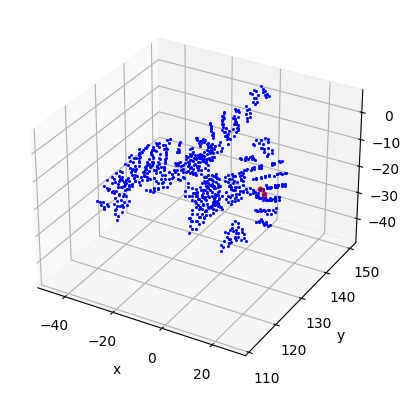

In [ ]:
def rotate_around_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3):

    a1 = x2 - x1
    b1 = y2 - y1
    c1 = z2 - z1
    a2 = x3 - x1
    b2 = y3 - y1
    c2 = z3 - z1
    a = b1 * c2 - b2 * c1
    b = a2 * c1 - a1 * c2
    c = a1 * b2 - b1 * a2
    d = (- a * x1 - b * y1 - c * z1)
    print("equation of plane is ",a, "x +",
          b, "y +",
          c, "z +",
          d, "= 0.")

    u = 1/np.sqrt(np.square(a) + np.square(b)) * np.array([b, -a, 0])
    u1 = u[0]
    u2 = u[1]
    cos = c/np.sqrt(np.square(a) + np.square(b) + np.square(c))
    sin = np.sqrt((np.square(a) + np.square(b))/(np.square(a)+np.square(b)+np.square(c)))

    rot_matrix = [
        [cos + np.square(u1)*(1-cos), u1*u2*(1-cos), u2*sin],
        [u1*u2*(1-cos), cos + np.square(u2)*(1-cos), -u1*sin],
        [-u2*sin, u1*sin, cos]
    ]
    trans = np.dot(rot_matrix,np.array([a,b,c]))
    a = trans[0]
    b= trans[1]
    c = trans[2]
    print(d/c)

    x_ar = []
    y_ar = []
    z_ar = []
    rotated_points = []
    for i in range(len(rna_df)):
      coord = rna_df['Coordinates'].iloc[i]
      product = np.dot(rot_matrix, coord)
      product[2] += d/c
      x_ar.append(product[0])
      y_ar.append(product[1])
      z_ar.append(product[2])
      rotated_points.append(product)







    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    print(x_ar[0], y_ar[0], z_ar[0])
    ax.scatter(x_ar[0], y_ar[0], z_ar[0], color= 'red', s=10)
    ax.scatter(x_ar[3], y_ar[3], z_ar[3], color= 'red', s=10)

    for i in range(len(rna_df)):
        ax.scatter(x_ar[i], y_ar[i], z_ar[i] ,color='b', s= 1.5)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()




x1, y1, z1 = df_final['Coordinates'][1402][0], df_final['Coordinates'][1402][1], df_final['Coordinates'][1402][2]
x2, y2, z2 = df_final['Coordinates'][1404][0], df_final['Coordinates'][1404][1], df_final['Coordinates'][1404][2]
x3, y3, z3 = df_final['Coordinates'][1399][0], df_final['Coordinates'][1399][1], df_final['Coordinates'][1399][2]
rotate_around_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3)

In [ ]:
def rotated_points_array(x1, y1, z1, x2, y2, z2, x3, y3, z3):

    a1 = x2 - x1
    b1 = y2 - y1
    c1 = z2 - z1
    a2 = x3 - x1
    b2 = y3 - y1
    c2 = z3 - z1
    a = b1 * c2 - b2 * c1
    b = a2 * c1 - a1 * c2
    c = a1 * b2 - b1 * a2
    d = (- a * x1 - b * y1 - c * z1)
    print("equation of plane is ",a, "x +",
          b, "y +",
          c, "z +",
          d, "= 0.")

    u = 1/np.sqrt(np.square(a) + np.square(b)) * np.array([b, -a, 0])
    u1 = u[0]
    u2 = u[1]
    cos = c/np.sqrt(np.square(a) + np.square(b) + np.square(c))
    sin = np.sqrt((np.square(a) + np.square(b))/(np.square(a)+np.square(b)+np.square(c)))

    rot_matrix = [
        [cos + np.square(u1)*(1-cos), u1*u2*(1-cos), u2*sin],
        [u1*u2*(1-cos), cos + np.square(u2)*(1-cos), -u1*sin],
        [-u2*sin, u1*sin, cos]
    ]
    trans = np.dot(rot_matrix,np.array([a,b,c]))
    a = trans[0]
    b= trans[1]
    c = trans[2]
    print(d/c)

    x_ar = []
    y_ar = []
    z_ar = []
    rotated_points = []
    for i in range(len(rna_df)):
      coord = rna_df['Coordinates'].iloc[i]
      product = np.dot(rot_matrix, coord)
      product[2] += d/c
      x_ar.append(product[0])
      y_ar.append(product[1])
      z_ar.append(product[2])
      rotated_points.append(product)

    return rotated_points

x1, y1, z1 = df_final['Coordinates'][1402][0], df_final['Coordinates'][1402][1], df_final['Coordinates'][1402][2]
x2, y2, z2 = df_final['Coordinates'][1404][0], df_final['Coordinates'][1404][1], df_final['Coordinates'][1404][2]
x3, y3, z3 = df_final['Coordinates'][1399][0], df_final['Coordinates'][1399][1], df_final['Coordinates'][1399][2]
rotated_array = rotated_points_array(x1, y1, z1, x2, y2, z2, x3, y3, z3)
rna_df['Rotated Points Around U0']= rotated_array

equation of plane is  3.9653437 x + -0.8810252 y + 2.8968897 z + -209.79987 = 0.
-42.05079554246299


<ipython-input-16-5c86f3c01ff4>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rna_df['Rotated Points Around U0']= rotated_array


In [ ]:
z = []
for i in rna_df['Rotated Points Around U0']:
  point = i
  z.append(point[2])

rna_df['Rotated Z Around U0'] = z

<ipython-input-17-ea5ddb77e03c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rna_df['Rotated Z Around U0'] = z


In [ ]:
rna_df

,Chain,Residue,Atom,Coordinates,Rotated Points Around U0,Rotated Z Around U0
1348,2,U0,N1,"[57.573, 113.454, 22.003]","[27.15073411773138, 120.21326125269901, -3.551...",-3.551410
1349,2,U0,C2,"[58.167, 113.626, 23.247]","[26.533906255471592, 120.65428116943559, -2.38...",-2.387376
1350,2,U0,O2,"[58.195, 114.717, 23.815]","[26.19615051903789, 121.82654864354033, -2.227...",-2.227979
1351,2,U0,N3,"[58.735, 112.465, 23.789]","[26.341049311827135, 119.66232641214124, -1.41...",-1.416218
1352,2,U0,C4,"[58.804, 111.196, 23.184]","[26.750641587720573, 118.31765604085857, -1.48...",-1.488572
...,...,...,...,...,...,...
2146,2,U87,N3,"[32.975, 105.836, 59.746]","[-18.290926439350212, 117.22632810879439, 0.15...",0.158485
2147,2,U87,C4,"[32.998, 105.233, 58.475]","[-17.32048611778274, 116.4128283493062, -0.454...",-0.454735
2148,2,U87,O4,"[32.037, 105.318, 57.707]","[-17.279492877677423, 116.27520275753686, -1.6...",-1.679459
2149,2,U87,C5,"[34.226, 104.535, 58.186]","[-16.41552956036314, 115.78660465446092, 0.476...",0.476718


In [ ]:
z_filter = rna_df[abs(rna_df['Rotated Z Around U0']) <= 1]

for index, row in z_filter.iterrows():
  if 'A' in row['Residue'] or 'G' in row['Residue']:
    print(row['Atom'])
    if '4' not in row['Atom']:
      z_filter = z_filter.drop(index)
    elif '1' not in row['Atom']:
      z_filter = z_filter.drop(index)
  if 'U' in row['Residue'] or 'C' in row['Residue']:
    if '6' not in row['Atom']:
      z_filter = z_filter.drop(index)
    elif '3' not in row['Atom']:
      z_filter = z_filter.drop(index)
z_filter

N9
C8
N7
C5
C6
N6
N1
C2
N3
C4
N9
C8
N7
N1
C2
N3
N9
C5
C6
N1
C4
N9
C8
N7
C8
N7
N9
C8
N7
N2
N9
C6
N1
C4


,Chain,Residue,Atom,Coordinates,Rotated Points Around U0,Rotated Z Around U0


In [ ]:
z_filter = rna_df[abs(rna_df['Rotated Z Around U0']) <= 1]

drop_array = []
for i in z_filter.index:
  if 'A' in z_filter['Residue'][i] or 'G' in z_filter['Residue'][i]:
    if '4' in z_filter['Atom'][i] or '1' in z_filter['Atom'][i]:
      continue
    else:
      drop_array.append(i)
  if 'C' in z_filter['Residue'][i] or 'U' in z_filter['Residue'][i]:
    if '6' in z_filter['Atom'][i] or '3' in z_filter['Atom'][i]:
      continue
    else:
      drop_array.append(i)
z_filter = z_filter.drop(drop_array)
z_filter

,Chain,Residue,Atom,Coordinates,Rotated Points Around U0,Rotated Z Around U0
1402,2,A6,N1,"[53.918, 125.125, 36.672]","[14.334007650379377, 133.9198225389314, -1.959...",-0.000002
1405,2,A6,C4,"[52.273, 124.713, 38.76]","[11.650322680461871, 133.73859624333363, -0.02...",-0.022312
1512,2,A17,N1,"[31.882, 108.584, 61.706]","[-20.26089861086555, 120.16917635253796, -0.05...",-0.057434
1522,2,A18,N1,"[34.731, 108.3, 58.94]","[-16.37731197424023, 119.65531375667898, 0.651...",0.651029
1525,2,A18,C4,"[34.489, 110.784, 59.932]","[-17.090466881511762, 122.243988966292, 0.5960...",0.596039
1529,2,C19,N3,"[36.777, 110.523, 57.036]","[-13.438318044315976, 121.67990710338525, 0.77...",0.779087
1537,2,C20,N3,"[38.719, 112.128, 53.212]","[-9.09064936048271, 122.75040855082025, -0.181...",-0.181195
1620,2,C29,C6,"[44.648, 138.976, 53.519]","[-3.391213295765401, 149.64941229503617, -0.03...",-0.031654
1646,2,U32,C6,"[42.762, 130.765, 53.271]","[-5.0554586364538245, 141.38914451258634, -0.2...",-0.224664
2130,2,G85,N1,"[37.974, 109.292, 54.635]","[-10.920711458951239, 120.15548990406546, 0.55...",0.553724


In [ ]:
count_freq = dict(z_filter['Residue'].value_counts())
z_filter_two = z_filter.copy()
z_filter_two['count_freq'] = z_filter_two['Residue']
z_filter_two['count_freq'] = z_filter_two['count_freq'].map(count_freq)
z_filter_two = z_filter_two[z_filter_two.count_freq>1]
z_filter_two['X Coord'] = z_filter_two['Rotated Points Around U0'].apply(lambda x: x[0])
z_filter_two['Y Coord'] = z_filter_two['Rotated Points Around U0'].apply(lambda x: x[1])
z_filter_two

,Chain,Residue,Atom,Coordinates,Rotated Points Around U0,Rotated Z Around U0,count_freq,X Coord,Y Coord
1402,2,A6,N1,"[53.918, 125.125, 36.672]","[14.334007650379377, 133.9198225389314, -1.959...",-0.000002,2,14.334008,133.919823
1405,2,A6,C4,"[52.273, 124.713, 38.76]","[11.650322680461871, 133.73859624333363, -0.02...",-0.022312,2,11.650323,133.738596
1522,2,A18,N1,"[34.731, 108.3, 58.94]","[-16.37731197424023, 119.65531375667898, 0.651...",0.651029,2,-16.377312,119.655314
1525,2,A18,C4,"[34.489, 110.784, 59.932]","[-17.090466881511762, 122.243988966292, 0.5960...",0.596039,2,-17.090467,122.243989
2130,2,G85,N1,"[37.974, 109.292, 54.635]","[-10.920711458951239, 120.15548990406546, 0.55...",0.553724,2,-10.920711,120.155490
2134,2,G85,C4,"[38.286, 107.756, 52.549]","[-9.211863542688985, 118.30913337467945, -0.13...",-0.138263,2,-9.211864,118.309133
2138,2,U86,N3,"[35.787, 107.271, 56.857]","[-14.179161419187137, 118.37254988575398, 0.46...",0.462573,2,-14.179161,118.372550
2142,2,U86,C6,"[36.88, 105.683, 54.988]","[-12.178516156480741, 116.58288353591047, 0.52...",0.526495,2,-12.178516,116.582884


In [ ]:
reference_x = z_filter_two['X Coord'].values[0]
reference_y = z_filter_two['Y Coord'].values[0]
z_filter_two['X Translated'] = z_filter_two['X Coord'] - reference_x
z_filter_two['Y Translated'] = z_filter_two['Y Coord'] - reference_y
r = z_filter_two.reset_index()
r

,index,Chain,Residue,Atom,Coordinates,Rotated Points Around U0,Rotated Z Around U0,count_freq,X Coord,Y Coord,X Translated,Y Translated
0,1402,2,A6,N1,"[53.918, 125.125, 36.672]","[14.334007650379377, 133.9198225389314, -1.959...",-0.000002,2,14.334008,133.919823,0.000000,0.000000
1,1405,2,A6,C4,"[52.273, 124.713, 38.76]","[11.650322680461871, 133.73859624333363, -0.02...",-0.022312,2,11.650323,133.738596,-2.683685,-0.181226
2,1522,2,A18,N1,"[34.731, 108.3, 58.94]","[-16.37731197424023, 119.65531375667898, 0.651...",0.651029,2,-16.377312,119.655314,-30.711320,-14.264509
3,1525,2,A18,C4,"[34.489, 110.784, 59.932]","[-17.090466881511762, 122.243988966292, 0.5960...",0.596039,2,-17.090467,122.243989,-31.424475,-11.675834
4,2130,2,G85,N1,"[37.974, 109.292, 54.635]","[-10.920711458951239, 120.15548990406546, 0.55...",0.553724,2,-10.920711,120.155490,-25.254719,-13.764333
5,2134,2,G85,C4,"[38.286, 107.756, 52.549]","[-9.211863542688985, 118.30913337467945, -0.13...",-0.138263,2,-9.211864,118.309133,-23.545871,-15.610689
6,2138,2,U86,N3,"[35.787, 107.271, 56.857]","[-14.179161419187137, 118.37254988575398, 0.46...",0.462573,2,-14.179161,118.372550,-28.513169,-15.547273
7,2142,2,U86,C6,"[36.88, 105.683, 54.988]","[-12.178516156480741, 116.58288353591047, 0.52...",0.526495,2,-12.178516,116.582884,-26.512524,-17.336939


In [ ]:
def rotate_2D(y_coord, x_coord):
  theta = np.arctan(y_coord / x_coord)
  rot_mat = np.array([np.cos(-theta), -np.sin(-theta), np.sin(-theta), np.cos(-theta)]).reshape(2,2)
  return rot_mat

y_reference = r['Y Translated'].values[1]
x_reference = r['X Translated'].values[1]
rotation_matrix = rotate_2D(y_reference, x_reference)

reference_points = np.array([[x_reference, y_reference]]).T

odd_r = r.iloc[1::2]  # odd
tester_list = []
x = odd_r['X Translated'].values
y= odd_r['Y Translated'].values

for i in range(len(x)):
    tester_list.append(np.dot(rotation_matrix, np.array([x[i], y[i]]).T).T)

odd_r['Rot X Coord'] = [arr[0] for arr in tester_list]
odd_r['Rot Y Coord'] = [arr[1] for arr in tester_list]

odd_r

In [ ]:
even_r = r.iloc[::2]
even_r['Rot X Coord'] = even_r['X Translated']
even_r['Rot Y Coord'] = even_r['Y Translated']
rotated_df = pd.concat([even_r, odd_r])
# rotated_df.sort_index()
rotated_copy = rotated_df.copy()

In [ ]:
rotated_copy = rotated_copy.sort_index()
rotated_copy

,index,Chain,Residue,Atom,Coordinates,Rotated Points Around U0,Rotated Z Around U0,count_freq,X Coord,Y Coord,X Translated,Y Translated,Rot X Coord,Rot Y Coord
0,1402,2,A6,N1,"[53.918, 125.125, 36.672]","[14.334007650379377, 133.9198225389314, -1.959...",-0.000002,2,14.334008,133.919823,0.000000,0.000000,0.000000,0.000000e+00
1,1405,2,A6,C4,"[52.273, 124.713, 38.76]","[11.650322680461871, 133.73859624333363, -0.02...",-0.022312,2,11.650323,133.738596,-2.683685,-0.181226,-2.689797,8.859684e-18
2,1522,2,A18,N1,"[34.731, 108.3, 58.94]","[-16.37731197424023, 119.65531375667898, 0.651...",0.651029,2,-16.377312,119.655314,-30.711320,-14.264509,-30.711320,-1.426451e+01
3,1525,2,A18,C4,"[34.489, 110.784, 59.932]","[-17.090466881511762, 122.243988966292, 0.5960...",0.596039,2,-17.090467,122.243989,-31.424475,-11.675834,-32.139733,-9.532064e+00
4,2130,2,G85,N1,"[37.974, 109.292, 54.635]","[-10.920711458951239, 120.15548990406546, 0.55...",0.553724,2,-10.920711,120.155490,-25.254719,-13.764333,-25.254719,-1.376433e+01
5,2134,2,G85,C4,"[38.286, 107.756, 52.549]","[-9.211863542688985, 118.30913337467945, -0.13...",-0.138263,2,-9.211864,118.309133,-23.545871,-15.610689,-24.544145,-1.398880e+01
6,2138,2,U86,N3,"[35.787, 107.271, 56.857]","[-14.179161419187137, 118.37254988575398, 0.46...",0.462573,2,-14.179161,118.372550,-28.513169,-15.547273,-28.513169,-1.554727e+01
7,2142,2,U86,C6,"[36.88, 105.683, 54.988]","[-12.178516156480741, 116.58288353591047, 0.52...",0.526495,2,-12.178516,116.582884,-26.512524,-17.336939,-27.620363,-1.551125e+01


In [ ]:
singular_point_df = rotated_copy.groupby('Residue')[['Rot X Coord', 'Rot Y Coord']].mean()
singular_point_df['Rot X Coord'] = singular_point_df['Rot X Coord'] - singular_point_df['Rot X Coord'][1]
singular_point_df['R'] = np.sqrt((singular_point_df['Rot X Coord'] ** 2) + (singular_point_df['Rot Y Coord'] ** 2))
singular_point_df['Theta'] = np.arctan(singular_point_df['Rot Y Coord'] / singular_point_df['Rot X Coord'])
singular_point_df

,Rot X Coord,Rot Y Coord,R,Theta
Residue,,,,
A18,-30.080628,-1.189829e+01,3.234831e+01,0.376661
A6,0.000000,4.429842e-18,4.429842e-18,1.570796
G85,-23.554534,-1.387657e+01,2.733816e+01,0.532385
U86,-26.721868,-1.552926e+01,3.090657e+01,0.526440


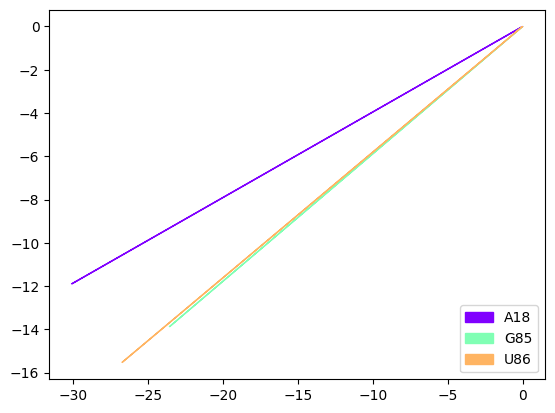

In [ ]:
cmap = plt.get_cmap('rainbow', 5)

for i in range(len(singular_point_df)):
  if i != 1:
    plt.arrow(0, 0, singular_point_df['Rot X Coord'][i],singular_point_df['Rot Y Coord'][i], label = singular_point_df.index[i], color = cmap(i))
  #plt.quiver(0,0, singular_point_df['Rot X Coord'][i], singular_point_df['Rot Y Coord'][i], angles = 'xy', scale_units = 'xy')
  # ax.plot(np.degrees(singular_point_df['Theta'].values[i]), singular_point_df['R'].values[i])

# print(singular_point_df['Rot X Coord'][0])
plt.legend(loc = 'lower right')
plt.show()
# graph as points not vectors

In [ ]:
#extra code
# plt.quiver(z_filter['X Vector'][1405], z_filter['Y Vector'][1405], angles="xy", scale_units="xy", scale = 1, color="Red")
# plt.quiver(z_filter['X Vector'][1525], z_filter['Y Vector'][1525], angles="xy", scale_units="xy", scale = 1, color="Blue")
# plt.quiver(z_filter['X Vector'][2134], z_filter['Y Vector'][2134], angles="xy", scale_units="xy", scale = 1, color="Green")
# plt.quiver(z_filter['X Vector'][2142], z_filter['Y Vector'][2142], angles="xy", scale_units="xy", scale = 1, color="Pink")
# plt.show()
# vector = z_filter.groupby('Residue')['Rotated Points Around U0'].diff()
# z_filter['Vector'] = vector
# z_filter['X Difference'] = z_filter['Vector'].apply(lambda x: x[0])
# z_filter['Y Difference'] = z_filter['Vector'].apply(lambda x: x[1])
# z_filter['Z Difference'] = z_filter['Vector'].apply(lambda x: x[2])
# z_filter['X Coord'] = z_filter['Rotated Points Around U0'].apply(lambda x: x[0])
# z_filter['Y Coord'] = z_filter['Rotated Points Around U0'].apply(lambda x: x[1])
# # z_filter['Z Coord'] =z_filter['Rotated Points Around U0'].apply(lambda x: x[2])
# # z_filter = z_filter.drop(columns ='Vector')
# z_filter= z_filter.dropna()
# z_filter